Prop. For a finite interval $[a,b]$,
$$\lim_{p\to\infty} \|f\|_{L^p([a,b])} = \|f\|_{L^\infty([a,b])}$$

More specifically,
$$\left[\int_{[a,b]} |f(x)|^p dx \right]^{1/p} \leq (b-a)^{1/p} \|f\|_{\infty}$$

Note that $(b-a)^{1/p} \to 1$ as $p\to\infty$, proving the limit. Thus, we show that $\|f\|_\infty$ is always bounded below:

$$\boxed{\|f\|_\infty \geq \frac{1}{(b-a)^{1/p}} \|f\|_p}$$

In [76]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

In [77]:
def f(x):
    return x**2 * np.sin(x)

def df(x):
    return 2*x*np.sin(x) + x**2 * np.cos(x)

# Analytical

In [78]:
x = np.arange(0,np.pi,0.001)

In [79]:
ks = opt.fsolve(df, 2.0)
ks

array([2.28892973])

In [80]:
f(ks)

array([3.94530163])

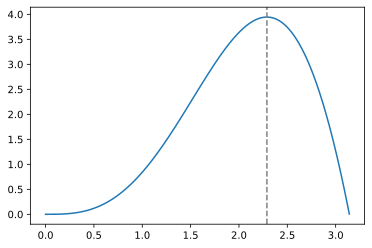

In [88]:
plt.plot(x, f(x))
plt.axvline(ks, linestyle='--', color='gray')
plt.show()

# Numerical

In [82]:
def lp(f, p, a, b):
    
    assert p >= 0
    
    import scipy.integrate as itg
    return (itg.quad(lambda x: np.abs(f(x))**p, a, b)[0])**(1.0/p)

In [110]:
p = [2**a for a in range(11)]

In [111]:
norm = [lp(f, pp, 0, np.pi)/(np.pi**(1/pp)) for pp in p]

<ipython-input-82-4c673167f5c4>:6: RuntimeWarning: overflow encountered in double_scalars
  return (itg.quad(lambda x: np.abs(f(x))**p, a, b)[0])**(1.0/p)


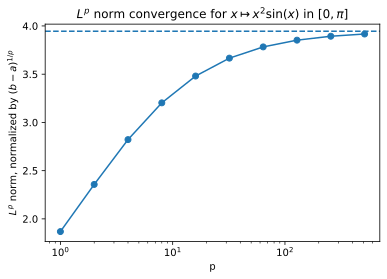

In [112]:
plt.plot(p,norm, marker='o')
plt.xscale('log')
plt.axhline(f(ks), linestyle='--')
plt.xlabel('p')
plt.ylabel('$L^p$ norm, normalized by $(b-a)^{1/p}$')
plt.title("$L^p$ norm convergence for $x \mapsto x^2 \sin(x)$ in $[0,\pi]$")
plt.show()